# Pytorch Workflow

1. data (preparation and load)
2. build model
3. fitting model to data (training)
4. making predicion
5. saving and loading model


In [ ]:
import torch
from torch import nn # nn contains all of the torch building blocks for neural networks

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.2.1+cu121'

# 1. Preparing and loading Data

data canbe almost anything.. in machin learning

* images
* text
* audio


machine learning a game of two parts.
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

Linear regression

# create a known parameters

In [ ]:
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

In [ ]:
x[: 10], y[:10], len(x), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

## TRain test split

In [ ]:
# create a train/test split
train_split = int(0.8 * len(x))
train_split

40

In [ ]:
x_train, y_train = x[:train_split], y[:train_split]
x_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
x_test, y_test = x[train_split:], y[train_split:]

In [ ]:
x_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

Visualize the data

In [ ]:
def plot_prediction(train_data = x_train,
                    train_labels= y_train,
                    test_data = x_test,
                    test_labels = y_test,
                    prediction=None):
  """Plot the training test set"""
  plt.figure(figsize=(8, 5))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=4, label="Predictions")

  plt.legend(prop={"size": 15})

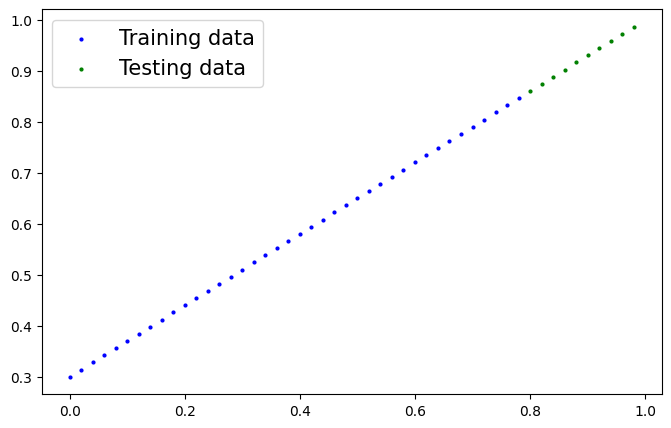

In [ ]:
plot_prediction()

### Model Building in Pytorch

what our model does:
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights & bias values we used to create the data)

How does it do so..?
1. Gradient Descent
2. Backpropagation

In [ ]:
# Create a Linear Regression model
from torch import nn

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(
        1,
        requires_grad=True,
        dtype=torch.float
    ))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # forward method to define the computational in the model

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # linear regression formula






Pytorch model building essentials

* `torch.nn` - contains all buildings for computational graph (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often pytorch later from torch.nn will set these for us
* `torch.nn.Module` - Base class for all neural network moduels, if you subclass it, you should overwrite forward()
* `torch.optim` - this where the optimizers in Pytorch live, this will help with gradient descent
* `def forward()` - all nn.Modules subclasses require you to overwrite forward(), this method defines what happens in the forward computation

Checking contents of our pytorch model

In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegression()

In [ ]:
# checkout the parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making Prediction using `torch.inference_mode()`

To check our model's predictive power

In [ ]:
# Make prediction with model

with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

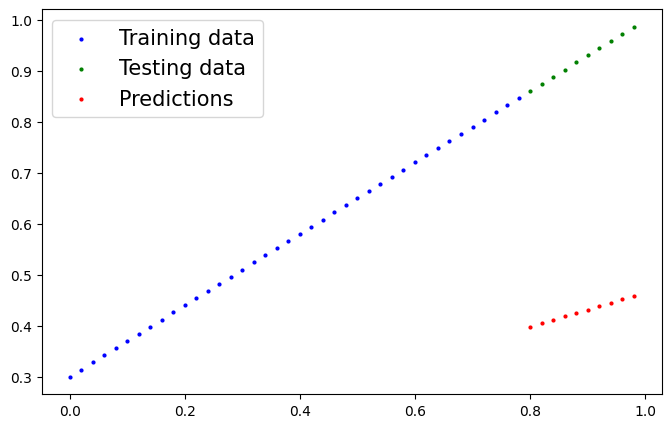

In [ ]:
plot_prediction(prediction=y_preds)

Train model

loss function is way to find the model's loss


loss function may also be called cost function or criterion in different areas.

**Loss function** : a function is to measure how wrong your model's prediction are to the ideal outputs, lower is better

**Optimizer :** takes into account the loss of a model and adjusts the model's parameters (weights & bias) to improve the loss function


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# TRain model

# Setup a loss function

loss_fn = nn.L1Loss()

# setup a optimizer (stochastic gradient descent)

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)




## Building training loop and testing loop in pytorch

0. Loop through the data
1. forward pass (this involves data moving through our model) also called forward propagation
2. calculate loss (compare forward pass prediction to ground truth labels)
3. Optimize the zero grad
4. Loss Backward - also called **backword propagation** (calculate the gradients of each of the parameters of our model with respect to the loss)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
with torch.no_grad():
  print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
list(model_0.train().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
with torch.inference_mode():
  list(model_0.parameters())

In [ ]:
# An epoch is one loop through the data

epochs = 100

# Training

# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(x_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through loop so... we have to zero them above in step 3 for next iteration


  model_0.eval() #turn off the gradient tracking



In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegression()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

#### Making prediction

In [ ]:
y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

# Save a Model

1. `torch.save()` - allows you save as pickle format
2. `torch.load()` - load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - load a model's saved state dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
from pathlib import Path


Model_path = Path("models")
Model_path.mkdir(parents=True, exist_ok=True)

Model_name = "01_pytorch_workflow.pth"
Model_save_path = Model_path / Model_name

Model_save_path

PosixPath('models/01_pytorch_workflow.pth')

In [ ]:
torch.save(obj=model_0.state_dict(),
           f=Model_save_path)

# Putting altogether

In [ ]:
# Putting all together

In [ ]:
# Import pytorch
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check python version
torch.__version__

'2.2.1+cu121'

create device-agnostic code

(GPU and CPU) -> pick which one is available

In [ ]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

#### Data


In [ ]:
# Create some data using linear regression formula of y = weight * X + bias

weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# create x and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# split data

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### Plot the data

In [ ]:
# Plot the data
def plot_prediction(train_data = X_train,
                    train_labels= y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    prediction=None):
  """Plot the training test set"""
  plt.figure(figsize=(8, 5))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=4, label="Predictions")

  plt.legend(prop={"size": 15})


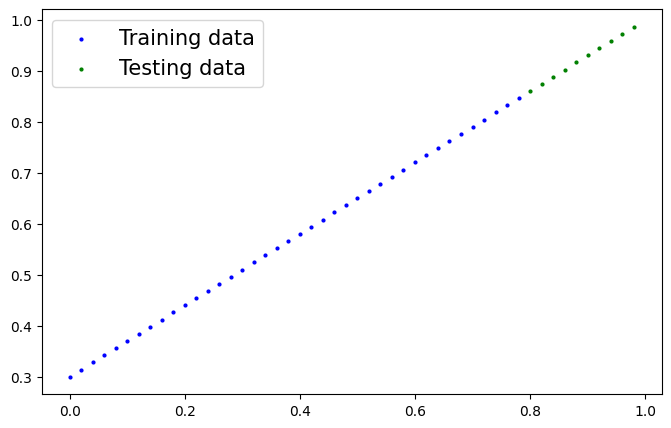

In [ ]:
plot_prediction(X_train, y_train, X_test, y_test)

#### Building a Pytorch Liner model

> Add blockquote



In [ ]:
# Create linear model by subclassing nn.Module

class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()

    # use nn.Linear() for creating the model parameters

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


  # Set the manual seed
  torch.manual_seed(42)

model_1 = LinearRegressionModelv2()
model_1, model_1.state_dict()

(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check the current model device

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to ue the target device

model_1.to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

#### Training

In [ ]:
# Setup loss function

loss_fn = nn.L1Loss() # same as MAE

# setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [ ]:
# training Loop

torch.manual_seed(42)

epochs = 200

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # Forward pass
  y_pred = model_1(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # Backpropagation
  loss.backward()

  # Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # print what's going on

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

#### Make prediction and evaluation mode

In [ ]:
# Turn model into eval mode

model_1.eval()

# Make prediciton
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

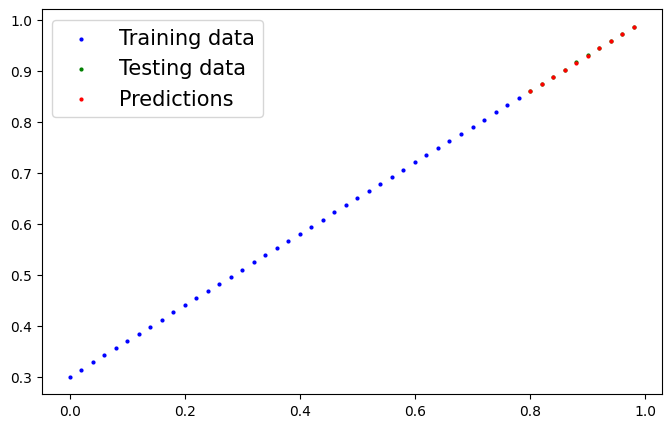

In [ ]:
# visualize the prediction

plot_prediction(prediction= y_preds.cpu())

#### Saving and loding pytorch model

In [ ]:
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# Create model save path
MODEL_NAME = "01_torch_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_torch_model_1.pth')

In [ ]:
# save the model state dict

print(f" Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

 Saving model to models/01_torch_model_1.pth


In [ ]:
# Load the Pytorch model

loaded_model_1 = LinearRegressionModelv2()  # Create a new instance

# Load the model_1 state dict

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# Put the model to device

loaded_model_1.to(device)

LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Evaluate loaded model

loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')